# Exploring test datasets

Mirroed from the analisys produced above for train datasets

### Loading data

In [1]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt

In [2]:
# csv's on test folder
pheno_test = r"../test/pheno_test.csv"
read_test = r"../test/readcounts_test.csv"
taxtable_test = r"../test/taxtable.csv"

Host phenotype data (pheno_test.csv): Individuals in rows and metadata variables in columns. Change first feature to appropriate name.

In [3]:
pheno_test_df = pd.read_csv(pheno_test)
pheno_test_df.rename(columns={"Unnamed: 0": "Sample_ID"}, inplace=True) # rename the first column to Sample_ID
pheno_test_df["Sample_ID"] = pheno_test_df["Sample_ID"].str.replace("Simulated_", "") # Change Sample_ID to only integer values
pheno_test_df.head()

,Sample_ID,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,2211,73.860,30.140,1.0,1,0.0,0.0,0.0,0.0,15.910,154.046,5.010,0
1,1629,48.070,18.252,1.0,0,0.0,0.0,0.0,0.0,11.189,184.064,3.922,0
2,1690,49.060,25.911,0.0,0,0.0,0.0,0.0,1.0,15.832,126.922,5.119,1
3,1367,58.499,25.739,0.0,0,0.0,0.0,0.0,0.0,15.818,141.003,3.890,1
4,3387,47.242,29.227,0.0,0,0.0,0.0,0.0,0.0,15.782,143.021,3.611,1


Taxonomic abundance table (readcounts_test.csv): Individuals in columns and taxon names in rows. Change first feature to apropriate name.

In [4]:
read_test_df = pd.read_csv(read_test)
read_test_df.rename(columns={"Unnamed: 0": "Taxon name"}, inplace=True) # rename the first column to Taxon name
read_test_df.head()

,Taxon name,Simulated_2211,Simulated_1629,Simulated_1690,Simulated_1367,Simulated_3387,Simulated_1746,Simulated_3625,Simulated_1596,Simulated_3430,...,Simulated_1743,Simulated_1357,Simulated_1372,Simulated_1326,Simulated_1696,Simulated_1628,Simulated_3424,Simulated_2215,Simulated_3426,Simulated_1679
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taxonomic mapping table (taxtable.csv): Mapping of the taxonomic species to higher taxonomic hierarchy (Kingdom, Phylum, Class, Order, Family, Genus and Species)

In [5]:
taxtable_test_df = pd.read_csv(taxtable_test)
taxtable_test_df.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
0,k__Archaea,p__,c__,o__,f__,g__,s__
1,k__Archaea,p__Candidatus_Korarchaeota,c__,o__,f__,g__,s__
2,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__,f__,g__,s__
3,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Acidilobaceae,g__Acidilobus,s__Acidilobus_saccharovorans
4,k__Archaea,p__Crenarchaeota,c__Thermoprotei,o__Acidilobales,f__Caldisphaeraceae,g__Caldisphaera,s__Caldisphaera_lagunensis


## Data structure verification

Number of columns and rows of eacch dataframe

In [6]:
print(f"The Host Phenotype data has {pheno_test_df.shape[0]} rows and {pheno_test_df.shape[1]} columns")
print(f"The Taxonomic abundance table has {read_test_df.shape[0]} rows and {read_test_df.shape[1]} columns")
print(f"The Taxonomic mapping table has {taxtable_test_df.shape[0]} rows and {taxtable_test_df.shape[1]} columns")

The Host Phenotype data has 1809 rows and 13 columns
The Taxonomic abundance table has 5748 rows and 1810 columns
The Taxonomic mapping table has 5748 rows and 7 columns


Name of every column

In [7]:
print(list(pheno_test_df.columns))
# print(list(read_test_df.columns)) # this prints the columns of the readcounts csv which are the sample ID's (3616 columns)
print(list(taxtable_test_df.columns))

['Sample_ID', 'Age', 'BodyMassIndex', 'Smoking', 'BPTreatment', 'PrevalentDiabetes', 'PrevalentCHD', 'PrevalentHFAIL', 'Event', 'Event_time', 'SystolicBP', 'NonHDLcholesterol', 'Sex']
['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']


Type of data for each column

In [8]:
print(pheno_test_df.dtypes)

Sample_ID             object
Age                  float64
BodyMassIndex        float64
Smoking              float64
BPTreatment            int64
PrevalentDiabetes    float64
PrevalentCHD         float64
PrevalentHFAIL       float64
Event                float64
Event_time           float64
SystolicBP           float64
NonHDLcholesterol    float64
Sex                    int64
dtype: object


In [9]:
print(taxtable_test_df.dtypes)

Domain     object
Phylum     object
Class      object
Order      object
Family     object
Genus      object
Species    object
dtype: object


In [10]:
print(read_test_df.dtypes)

Taxon name        object
Simulated_2211     int64
Simulated_1629     int64
Simulated_1690     int64
Simulated_1367     int64
                   ...  
Simulated_1628     int64
Simulated_3424     int64
Simulated_2215     int64
Simulated_3426     int64
Simulated_1679     int64
Length: 1810, dtype: object


Range of values for each Feature of host phenotype data.

In [11]:
for col in pheno_test_df.columns:
    print(f"{col}:         {pheno_test_df[col].min()} ----------------- {pheno_test_df[col].max()}")

Sample_ID:         1000 ----------------- 997
Age:         24.099 ----------------- 74.239
BodyMassIndex:         16.374 ----------------- 55.98
Smoking:         0.0 ----------------- 1.0
BPTreatment:         0 ----------------- 1
PrevalentDiabetes:         0.0 ----------------- 1.0
PrevalentCHD:         0.0 ----------------- 1.0
PrevalentHFAIL:         0.0 ----------------- 1.0
Event:         0.0 ----------------- 1.0
Event_time:         -15.909 ----------------- 16.0
SystolicBP:         87.902 ----------------- 253.075
NonHDLcholesterol:         1.191 ----------------- 9.031
Sex:         0 ----------------- 1


Range of values for each Feature of Taxonomic abundance data. Same is not done to the last dataset because it contains only non numerical values

In [12]:
for col in read_test_df.columns[1:20]:
    print(f"{col}:         {read_test_df[col].min()} ----------------- {read_test_df[col].max()}")

Simulated_2211:         0 ----------------- 20580
Simulated_1629:         0 ----------------- 109661
Simulated_1690:         0 ----------------- 214253
Simulated_1367:         0 ----------------- 354395
Simulated_3387:         0 ----------------- 244636
Simulated_1746:         0 ----------------- 92738
Simulated_3625:         0 ----------------- 92631
Simulated_1596:         0 ----------------- 55556
Simulated_3430:         0 ----------------- 288649
Simulated_1717:         0 ----------------- 276696
Simulated_1595:         0 ----------------- 172259
Simulated_1613:         0 ----------------- 135723
Simulated_1620:         0 ----------------- 268867
Simulated_1599:         0 ----------------- 109708
Simulated_1323:         0 ----------------- 257379
Simulated_1325:         0 ----------------- 91007
Simulated_1672:         0 ----------------- 315046
Simulated_1709:         0 ----------------- 321853
Simulated_1712:         0 ----------------- 50838


## Analysis of missing values

In [13]:
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking              11
BPTreatment           0
PrevalentDiabetes    30
PrevalentCHD         30
PrevalentHFAIL       30
Event                30
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

In [14]:
null_data_test = pheno_test_df[pheno_test_df.isna().any(axis=1)]
null_data_test.head()

,Sample_ID,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
67,3539,64.071,31.567,1.0,0,NaN,NaN,NaN,NaN,NaN,138.948,5.089,0
80,311,46.118,29.152,0.0,0,NaN,NaN,NaN,NaN,NaN,143.974,3.072,0
216,6568,25.179,26.876,NaN,0,0.0,0.0,0.0,0.0,15.940,104.986,3.260,1
273,2425,31.720,36.696,1.0,0,NaN,NaN,NaN,NaN,NaN,109.053,4.679,1
318,5114,49.798,26.212,NaN,0,0.0,0.0,0.0,0.0,14.002,131.037,4.750,0


In [15]:
read_test_df.isna().sum().sum()

0

In [16]:
taxtable_test_df.isna().sum()

Domain      0
Phylum      0
Class       0
Order       0
Family      0
Genus       0
Species    35
dtype: int64

In [17]:
null_data_taxtable_test = taxtable_test_df[taxtable_test_df.isna().any(axis=1)]
null_data_taxtable_test.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
5662,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Adenoviridae,o__,f__,g__,NaN
5663,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Ascoviridae,o__,f__,g__,NaN
5664,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Baculoviridae,o__,f__,g__,NaN
5665,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Caudovirales,o__,f__,g__,NaN
5666,k__Viruses,"p__dsDNA_viruses,_no_RNA_stage",c__Herpesvirales,o__,f__,g__,NaN


The host phenotype and the taxonomic mapping datasets have missing values that need to be removed or replaced to continue to the next step.

### Change empty species to Unidentified Species in the taxonomic mapping dataset

In [18]:
taxtable_test_df["Species"] = taxtable_test_df["Species"].fillna("Unidentified Species")
taxtable_test_df.isna().sum()

Domain     0
Phylum     0
Class      0
Order      0
Family     0
Genus      0
Species    0
dtype: int64

#### Treating missing values on Host Phenotype dataset

For the smoking feature we will use mode imputation.

In [19]:
mode_smoking = pheno_test_df["Smoking"].mode()[0]
pheno_test_df["Smoking"] = pheno_test_df["Smoking"].fillna(mode_smoking)
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking               0
BPTreatment           0
PrevalentDiabetes    30
PrevalentCHD         30
PrevalentHFAIL       30
Event                30
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

For the PrevalentDiabetes feature we will use mode imputation.

In [20]:
mode_diabetes = pheno_test_df["PrevalentDiabetes"].mode()[0]
pheno_test_df["PrevalentDiabetes"] = pheno_test_df["PrevalentDiabetes"].fillna(mode_diabetes)
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking               0
BPTreatment           0
PrevalentDiabetes     0
PrevalentCHD         30
PrevalentHFAIL       30
Event                30
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

For the PrevalentCHD variable we will use mode imputation.

In [21]:
mode_chd = pheno_test_df["PrevalentCHD"].mode()[0]
pheno_test_df["PrevalentCHD"] = pheno_test_df["PrevalentCHD"].fillna(mode_chd)
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking               0
BPTreatment           0
PrevalentDiabetes     0
PrevalentCHD          0
PrevalentHFAIL       30
Event                30
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

For the PrevalentHFAIL variable we will also use mode imputation.

In [22]:
mode_hfail = pheno_test_df["PrevalentHFAIL"].mode()[0]
pheno_test_df["PrevalentHFAIL"] = pheno_test_df["PrevalentHFAIL"].fillna(mode_hfail)
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking               0
BPTreatment           0
PrevalentDiabetes     0
PrevalentCHD          0
PrevalentHFAIL        0
Event                30
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

For the Event variable we will also use mode imputation.

In [23]:
mode_event = pheno_test_df["Event"].mode()[0]
pheno_test_df["Event"] = pheno_test_df["Event"].fillna(mode_event)
pheno_test_df.isna().sum()

Sample_ID             0
Age                   0
BodyMassIndex         0
Smoking               0
BPTreatment           0
PrevalentDiabetes     0
PrevalentCHD          0
PrevalentHFAIL        0
Event                 0
Event_time           30
SystolicBP            1
NonHDLcholesterol     3
Sex                   0
dtype: int64

For the Event_time variable we will use mean imputation

In [24]:
mean_time = pheno_test_df["Event_time"].mean()
pheno_test_df["Event_time"] = pheno_test_df["Event_time"].fillna(mean_time)
pheno_test_df.isna().sum()

Sample_ID            0
Age                  0
BodyMassIndex        0
Smoking              0
BPTreatment          0
PrevalentDiabetes    0
PrevalentCHD         0
PrevalentHFAIL       0
Event                0
Event_time           0
SystolicBP           1
NonHDLcholesterol    3
Sex                  0
dtype: int64

For the NonHDLcholesterol variable we will use mean imputation.

In [25]:
mean_cholesterol = pheno_test_df["NonHDLcholesterol"].mean()
pheno_test_df["NonHDLcholesterol"] = pheno_test_df["NonHDLcholesterol"].fillna(mean_cholesterol)
pheno_test_df.isna().sum()

Sample_ID            0
Age                  0
BodyMassIndex        0
Smoking              0
BPTreatment          0
PrevalentDiabetes    0
PrevalentCHD         0
PrevalentHFAIL       0
Event                0
Event_time           0
SystolicBP           1
NonHDLcholesterol    0
Sex                  0
dtype: int64

For the SystolicBP variable we will use mean imputation

In [26]:
mean_systolic_bp = pheno_test_df["SystolicBP"].mean()
pheno_test_df["SystolicBP"] = pheno_test_df["SystolicBP"].fillna(mean_systolic_bp)
pheno_test_df.isna().sum()

Sample_ID            0
Age                  0
BodyMassIndex        0
Smoking              0
BPTreatment          0
PrevalentDiabetes    0
PrevalentCHD         0
PrevalentHFAIL       0
Event                0
Event_time           0
SystolicBP           0
NonHDLcholesterol    0
Sex                  0
dtype: int64

### Data summary

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pheno_test_df.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000,1809.000
mean,49.339,26.853,0.237,0.155,0.066,0.025,0.021,0.080,13.860,135.999,4.082,0.437
std,14.782,4.693,0.425,0.362,0.248,0.157,0.143,0.272,5.248,22.299,1.087,0.496
min,24.099,16.374,0.000,0.000,0.000,0.000,0.000,0.000,-15.909,87.902,1.191,0.000
25%,36.959,23.665,0.000,0.000,0.000,0.000,0.000,0.000,15.731,119.956,3.312,0.000
50%,50.581,26.212,0.000,0.000,0.000,0.000,0.000,0.000,15.819,132.002,3.980,0.000
75%,61.510,29.330,0.000,0.000,0.000,0.000,0.000,0.000,15.881,148.999,4.719,1.000
max,74.239,55.980,1.000,1.000,1.000,1.000,1.000,1.000,16.000,253.075,9.031,1.000


In [28]:
read_test_df.describe()

,Simulated_2211,Simulated_1629,Simulated_1690,Simulated_1367,Simulated_3387,Simulated_1746,Simulated_3625,Simulated_1596,Simulated_3430,Simulated_1717,...,Simulated_1743,Simulated_1357,Simulated_1372,Simulated_1326,Simulated_1696,Simulated_1628,Simulated_3424,Simulated_2215,Simulated_3426,Simulated_1679
count,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,...,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000,5748.000
mean,53.719,106.922,225.196,213.492,99.708,115.734,130.066,70.369,95.916,396.829,...,65.107,76.822,48.504,220.553,429.371,42.666,266.963,239.406,89.833,44.271
std,631.052,2258.873,4429.515,5637.424,3322.793,2112.061,2353.436,1150.086,3864.154,7064.241,...,1195.377,1420.474,944.988,5753.208,6763.298,1021.775,9264.318,5385.160,1437.692,1217.748
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.000,1.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000,2.000,...,1.000,0.000,0.000,2.000,2.000,0.250,1.000,1.000,1.000,0.000
max,20580.000,109661.000,214253.000,354395.000,244636.000,92738.000,92631.000,55556.000,288649.000,276696.000,...,61793.000,78018.000,42088.000,378149.000,239810.000,65741.000,670817.000,320964.000,69360.000,75438.000


In [29]:
taxtable_test_df.describe()

,Domain,Phylum,Class,Order,Family,Genus,Species
count,5748,5748,5748,5748,5748,5748,5748
unique,5,51,150,174,370,1480,4536
top,k__Bacteria,p__Proteobacteria,c__Actinobacteria,o__Bacillales,f__Flavobacteriaceae,g__,s__
freq,5024,2215,916,391,196,346,845


### Training data vizualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pheno_test_df.columns

Index(['Sample_ID', 'Age', 'BodyMassIndex', 'Smoking', 'BPTreatment',
       'PrevalentDiabetes', 'PrevalentCHD', 'PrevalentHFAIL', 'Event',
       'Event_time', 'SystolicBP', 'NonHDLcholesterol', 'Sex'],
      dtype='object')

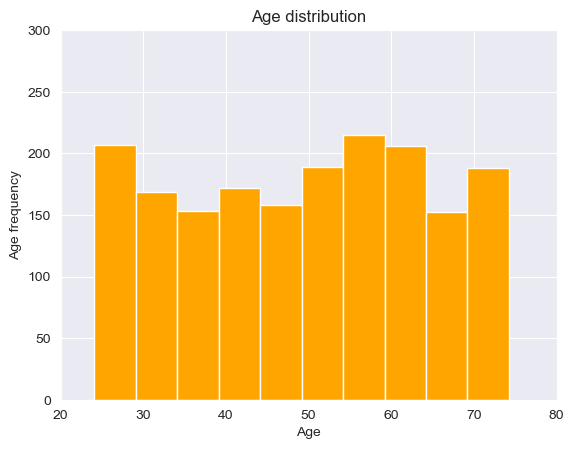

In [32]:
plt.hist(pheno_test_df["Age"], color="orange")
plt.axis([20, 80, 0, 300])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Age frequency")
plt.show()

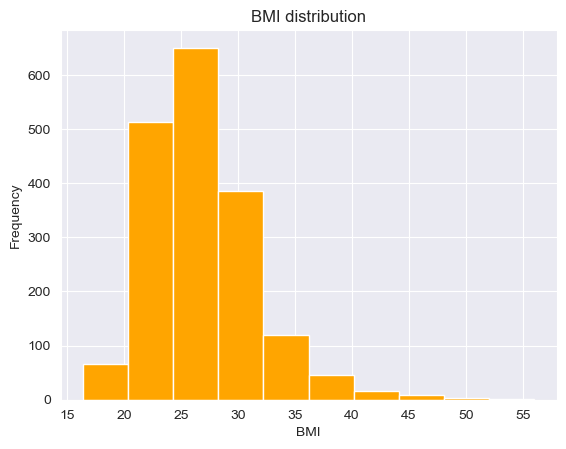

In [33]:
plt.hist(pheno_test_df["BodyMassIndex"], color="orange")
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

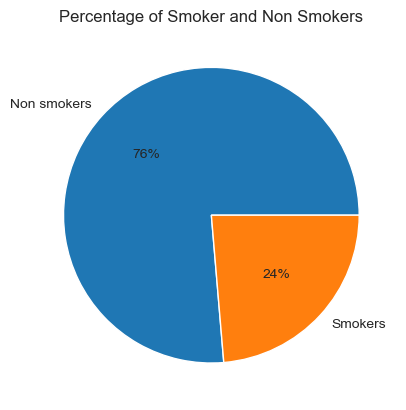

In [34]:
percent_smoking = (pd.Series.value_counts(pheno_test_df["Smoking"] == 1) / pheno_test_df.shape[0]) * 100

plt.pie(percent_smoking, labels=["Non smokers", "Smokers"], autopct='%1.0f%%')
plt.title("Percentage of Smoker and Non Smokers")
plt.show()

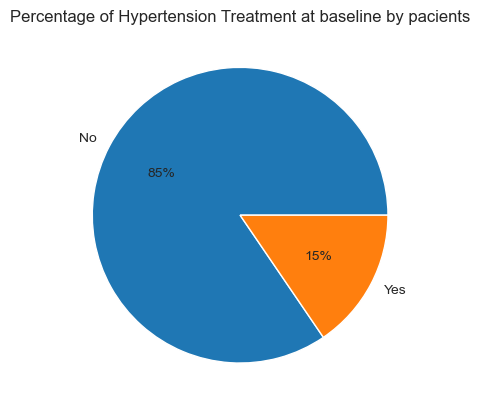

In [35]:
percent_bptreatment = (pd.Series.value_counts(pheno_test_df["BPTreatment"] == 1) / pheno_test_df.shape[0]) * 100

plt.pie(percent_bptreatment, labels=["No", "Yes"], autopct='%1.0f%%')
plt.title("Percentage of Hypertension Treatment at baseline by pacients")
plt.show()

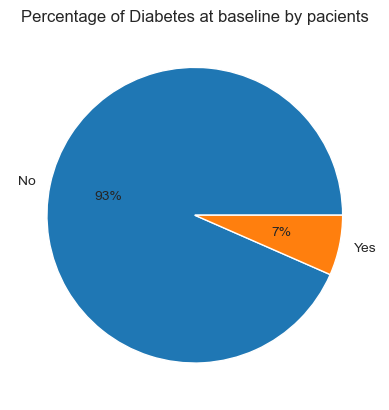

In [36]:
percent_diabetes = (pd.Series.value_counts(pheno_test_df["PrevalentDiabetes"] == 1) / pheno_test_df.shape[0]) * 100

plt.pie(percent_diabetes, labels=["No", "Yes"], autopct='%1.0f%%')
plt.title("Percentage of Diabetes at baseline by pacients")
plt.show()

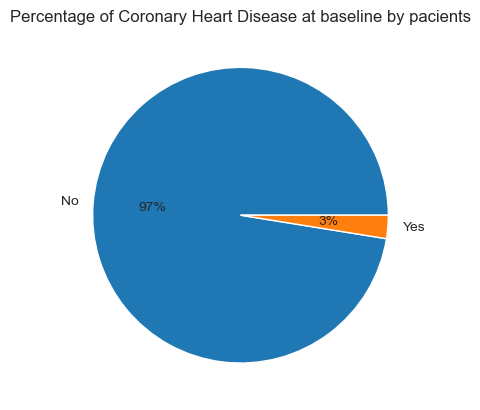

In [37]:
percent_CHD = (pd.Series.value_counts(pheno_test_df["PrevalentCHD"] == 1) / pheno_test_df.shape[0]) * 100

plt.pie(percent_CHD, labels=["No", "Yes"], autopct='%1.0f%%')
plt.title("Percentage of Coronary Heart Disease at baseline by pacients")
plt.show()

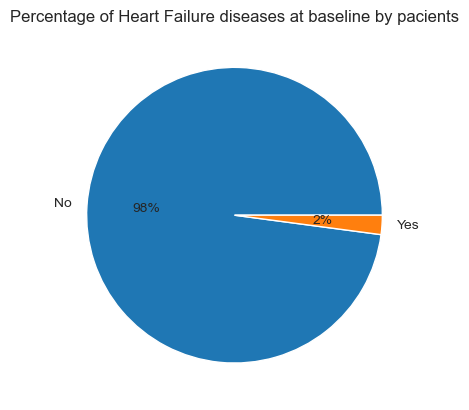

In [38]:
percent_HFail = (pd.Series.value_counts(pheno_test_df["PrevalentHFAIL"] == 1) / pheno_test_df.shape[0]) * 100

plt.pie(percent_HFail, labels=["No", "Yes"], autopct='%1.0f%%')
plt.title("Percentage of Heart Failure diseases at baseline by pacients")
plt.show()

## Statistical tests

Statistical test to ensure the distribution of the variables

BodyMassIndex ----->    P-VALUE:      1.275509890986634e-26
Event_time ----->    P-VALUE:      0.0
NonHDLcholesterol ----->    P-VALUE:      5.867061800583426e-15
SystolicBP ----->    P-VALUE:      6.35829210237336e-22


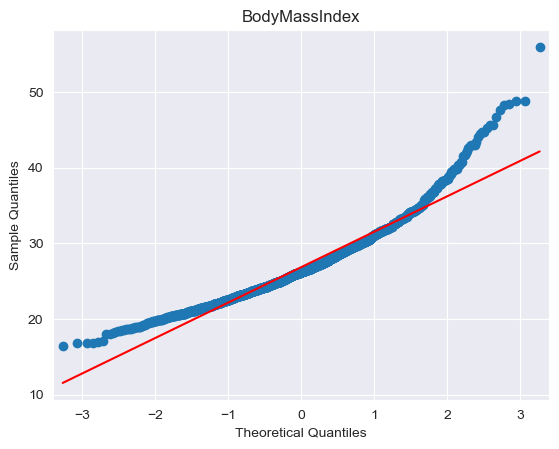

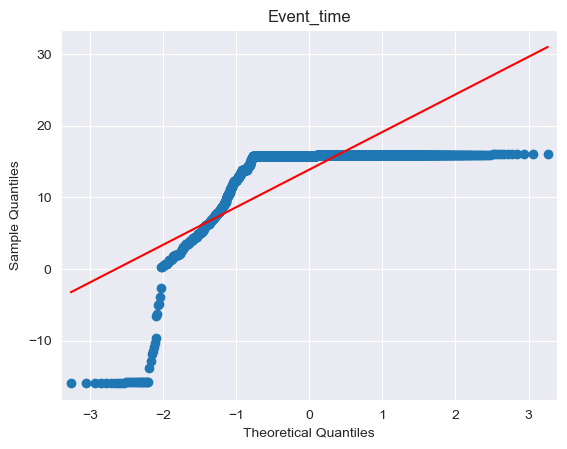

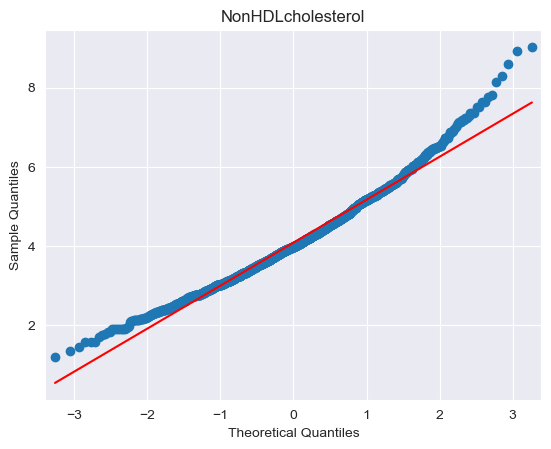

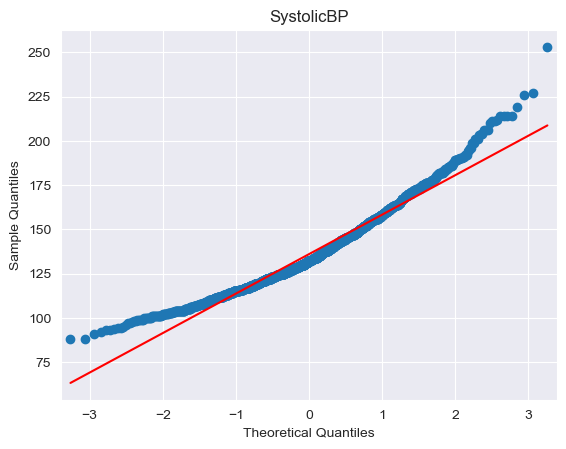

In [39]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt



columns_to_plot = pheno_test_df.columns.difference(["Sample_ID", "Sex", "Age", "Event", "Smoking", "BPTreatment", "PrevalentDiabetes", "PrevalentCHD", "PrevalentHFAIL"])

for col in columns_to_plot:
    data = pheno_test_df[col]

    fig = qqplot(data, dist=norm, line="s")
    plt.title(col)
    print(f"{col} ----->    P-VALUE:      {shapiro(pheno_test_df[col]).pvalue}")

Exporting datasets to csv to further use

In [40]:
pheno_test_df.to_csv("../test/pheno_test_treated.csv", index=False)
read_test_df.to_csv("../test/readcounts_test_treated.csv", index=False)
taxtable_test_df.to_csv("../test/taxtable_test_treated.csv", index=False)